In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [43]:
df = pd.read_csv('Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [45]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [48]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [49]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [50]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)


In [52]:
x_train.shape


(105, 4)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])


    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [54]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [56]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                160       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100


4/4 - 1s - loss: 1.0350 - accuracy: 0.3619 - 1s/epoch - 310ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0253 - accuracy: 0.4667 - 28ms/epoch - 7ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9351 - accuracy: 0.4952 - 24ms/epoch - 6ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9089 - accuracy: 0.5048 - 25ms/epoch - 6ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8369 - accuracy: 0.6000 - 24ms/epoch - 6ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8320 - accuracy: 0.6476 - 22ms/epoch - 5ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8154 - accuracy: 0.6571 - 27ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7415 - accuracy: 0.6667 - 30ms/epoch - 8ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7360 - accuracy: 0.6857 - 29ms/epoch - 7ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7285 - accuracy: 0.7238 - 21ms/epoch - 5ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7045 - accuracy: 0.7048 - 25ms/epoch - 6ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6677 - accuracy: 0.7619 - 26ms/epoch - 7ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6696 - accuracy

In [60]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 2ms/step
[[9.99988675e-01 1.10099973e-05 3.89756480e-07]
 [8.94460082e-03 9.32928860e-01 5.81265576e-02]
 [9.99748766e-01 2.39657355e-04 1.15730745e-05]
 [7.22087745e-04 2.14036517e-02 9.77874339e-01]
 [9.99752700e-01 2.35135216e-04 1.21177609e-05]]


In [61]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [62]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [64]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

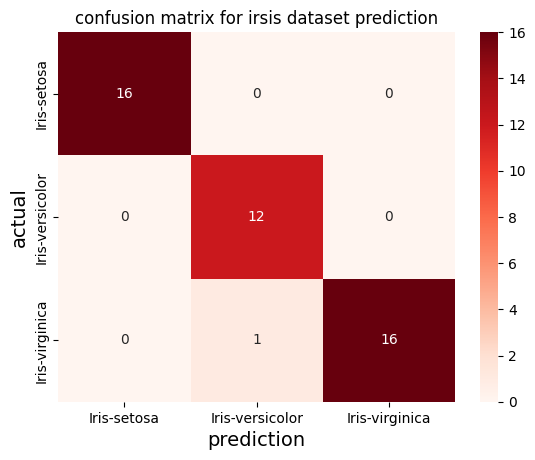

In [65]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)


C:\Users\santo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


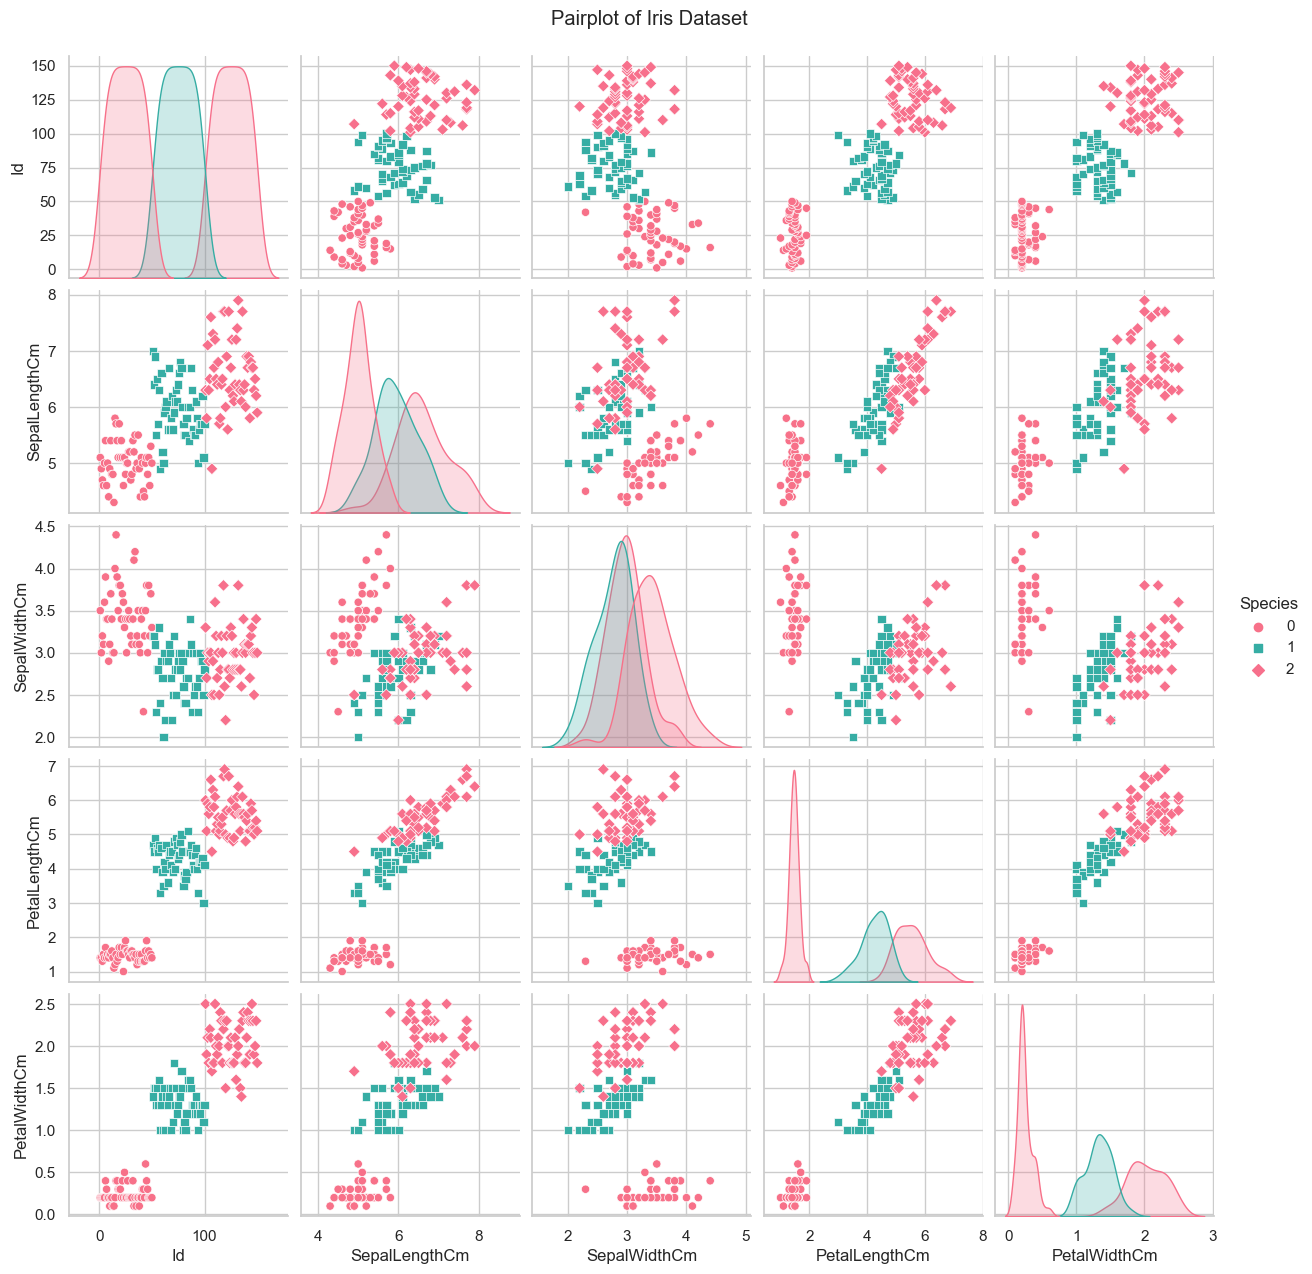

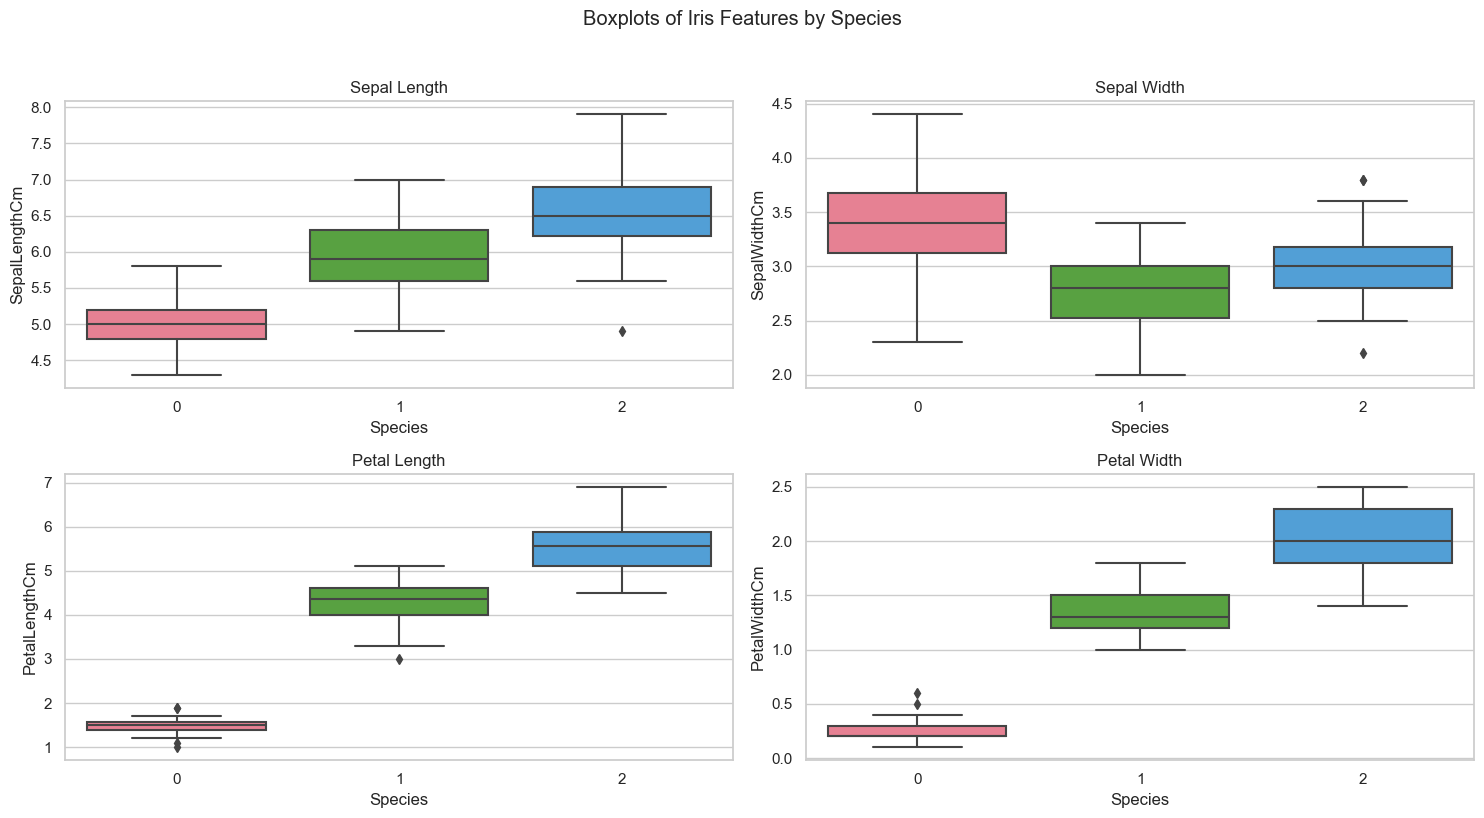

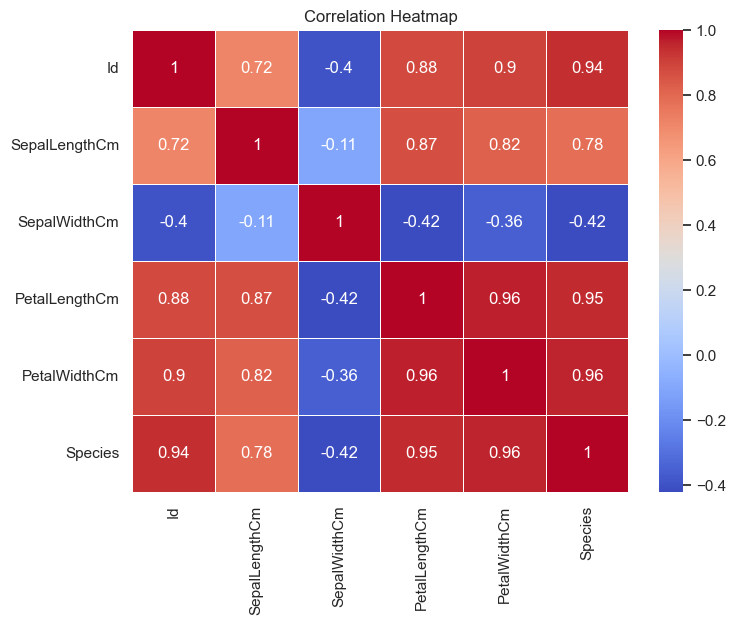

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming you have a Pandas DataFrame named 'df')
# If not, you can load the data using pd.read_csv() or another appropriate method
# Example: df = pd.read_csv('your_dataset.csv')

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Pairplot for pairwise relationships
sns.pairplot(df, hue="Species", markers=["o", "s", "D"], palette="husl")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Boxplot for individual features
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="SepalLengthCm", data=df, palette="husl")
plt.title("Sepal Length")

plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="SepalWidthCm", data=df, palette="husl")
plt.title("Sepal Width")

plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="PetalLengthCm", data=df, palette="husl")
plt.title("Petal Length")

plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="PetalWidthCm", data=df, palette="husl")
plt.title("Petal Width")

plt.suptitle("Boxplots of Iris Features by Species", y=1.02)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
